In [1]:
import pandas as pd
import numpy as np

In [2]:
import kagglehub
path = kagglehub.dataset_download("salader/dogs-vs-cats")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-vs-cats


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [6]:
# normalise
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
import matplotlib.pyplot as plt


In [8]:
# create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 166ms/step - accuracy: 0.5749 - loss: 0.6786 - val_accuracy: 0.7339 - val_loss: 0.5264
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 103ms/step - accuracy: 0.7334 - loss: 0.5236 - val_accuracy: 0.8038 - val_loss: 0.4293
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.8056 - loss: 0.4231 - val_accuracy: 0.8443 - val_loss: 0.3503
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 95s 124ms/step - accuracy: 0.8595 - loss: 0.3192 - val_accuracy: 0.8949 - val_loss: 0.2594
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 124ms/step - accuracy: 0.9213 - loss: 0.1989 - val_accuracy: 0.9117 - val_loss: 0.2516
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 103ms/step - accuracy: 0.9544 - loss: 0.1173 - val_accuracy: 0.9325 - val_loss: 0.1895
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 103ms/step - accuracy: 0.9729 - loss: 0.0802 - val_accuracy: 0.9419 - val_loss: 0.1719
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 105ms/step - accuracy: 0.9790 - loss: 

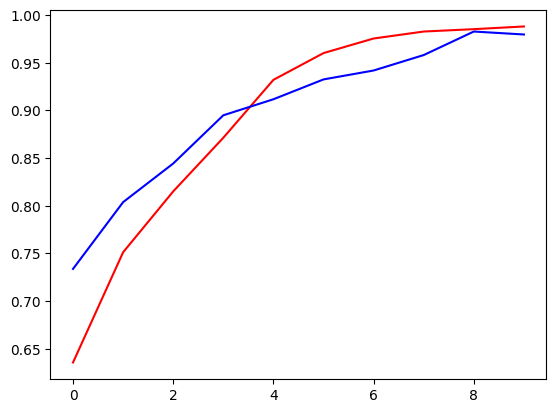

In [12]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')

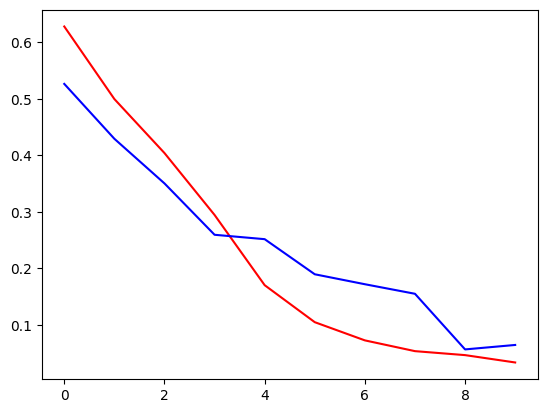

In [13]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')

In [14]:
import cv2

In [25]:
cat_test1 = cv2.imread('/content/cat1.jpg')

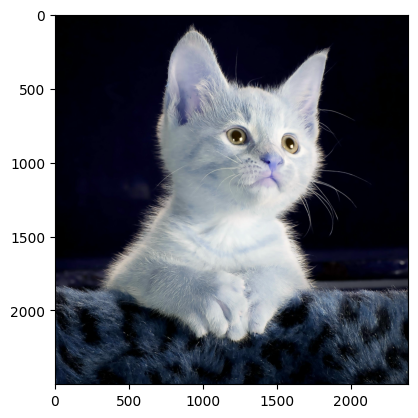

In [26]:
plt.imshow(cat_test1)

In [27]:
cat_test1.shape

(2500, 2392, 3)

In [28]:
cat_test1 = cv2.resize(cat_test1, (256, 256))
cat_test1 = cat_test1 / 255.0
cat_test1 = cat_test1.reshape((1, 256, 256, 3))

In [30]:
prediction = model.predict(cat_test1)
print("Prediction:", prediction)
print("Classified as:", "Dog" if prediction[0][0] > 0.5 else "Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Prediction: [[4.8170015e-14]]
Classified as: Cat


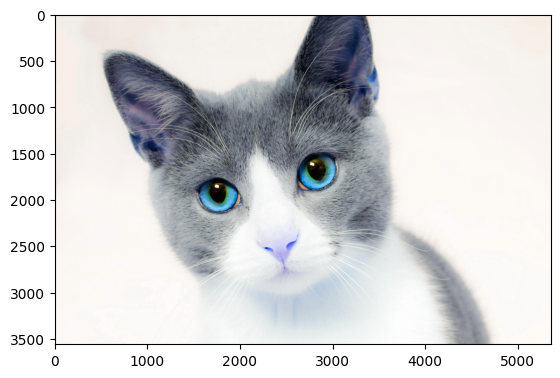

In [ ]:
cat_test2 = cv2.imread('/content/cat2.jpg')
plt.imshow(cat_test2)
# looks like GOJO

In [32]:
cat_test2 = cv2.resize(cat_test2, (256, 256))
cat_test2 = cat_test2 / 255.0
cat_test2 = cat_test2.reshape((1, 256, 256, 3))
prediction = model.predict(cat_test2)
print("Prediction:", prediction)
print("Classified as:", "Dog" if prediction[0][0] > 0.5 else "Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction: [[3.2791053e-05]]
Classified as: Cat


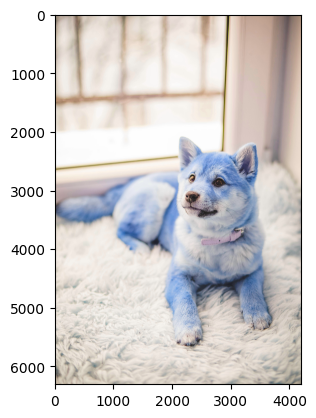

In [33]:
dog_test1 = cv2.imread('/content/dog1.jpg')
plt.imshow(dog_test1)

In [34]:
dog_test1 = cv2.resize(dog_test1, (256, 256))
dog_test1 = dog_test1 / 255.0
dog_test1 = dog_test1.reshape((1, 256, 256, 3))
prediction = model.predict(dog_test1)
print("Prediction:", prediction)
print("Classified as:", "Dog" if prediction[0][0] > 0.5 else "Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: [[0.00025751]]
Classified as: Cat


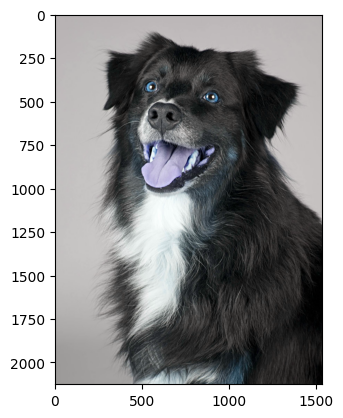

In [35]:
dog_test2 = cv2.imread('/content/dog2.jpg')
plt.imshow(dog_test2)

In [36]:
dog_test2 = cv2.resize(dog_test2, (256, 256))
dog_test2 = dog_test2 / 255.0
dog_test2 = dog_test2.reshape((1, 256, 256, 3))
prediction = model.predict(dog_test2)
print("Prediction:", prediction)
print("Classified as:", "Dog" if prediction[0][0] > 0.5 else "Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Prediction: [[0.9999969]]
Classified as: Dog
